# Introduction
* ANNs are the core of deep learning and allow it to be versitile, powerful and scalable.
* First proposed model had neurons that has one or more binary (on/off) inputs and one output
* The output is activated when more than a certain number of its inputs are active
* Perceptron is the simplest ANN architecture
* Based on threeshold logic unit (TLU) or linear threshold unit (LTU)
* TLU has weights for every feature and computers the linear function z = w(Transposed)x + b
* Very similar to logistical regression but preforms a step function instead of a logistic function
* Most common step function is Heaviside step function where the output is 0 if z is less than 0, 1 otherwise
* Fully connected layer or dense layer means every TLU is connected to every other input.
* Inputs is the input layer and outputs is the output layer


In [2]:
import sklearn

In [3]:
import tensorflow as tf

2024-04-16 15:39:42.170959: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-16 15:39:42.195605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 15:39:42.583438: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
# Basic Perceptron based model for iris dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)

In [6]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [7]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0)  # Iris setosa

percep_model = Perceptron(random_state=42)
percep_model.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
percep_model.predict(X_new)

array([ True, False])

* Problems that a single layer perceptron model is it is limited. It can't some simple problems like XOR
* Thats where multi layer perceptrons come in (MLP)
* This MLP is composed of one or more <i>hidden layers</i> on top of the <i>input layer</i> and the <i>output layer</i>
* lower layers are close to inputs while upper layers are close to outputs
* When there is a deep stack of hidden layers then it is called a deep neural network (more than 2 hidden layers)
* For regression tasks like predicting the house price, you only need one output layer neuron.
* for mulitvariate like a pixel position you would need one output neuron for each dimension
* Simple bounding box would need 4 output neurons (Pixel X, Pixel Y, Width, Heigh)

In [8]:
# Predict housing problem example using DNN
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing(as_frame=True)

In [9]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
from sklearn.model_selection import train_test_split

X = cal_housing.data
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor

In [12]:
pipeline = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50, 50, 50), random_state=42))

In [13]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              random_state=42))])

In [14]:
pipeline = pipeline.fit(X_train, y_train)

In [15]:
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, recall_score

In [16]:
test_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print(f'Root Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

NameError: name 'mse' is not defined

# Testing MLPClassifer On Iris Data Set

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
iris_features = iris.data
iris_labels = iris.target
iris_label_names = iris.target_names

In [ ]:
iris_train, iris_test, iris_train_label, iris_test_label = train_test_split(iris_features, iris_labels, random_state=42)

iris_clf_pipeline = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(10), random_state=42, max_iter=10_000))
iris_clf_pipeline = iris_clf_pipeline.fit(iris_train, iris_train_label)

In [ ]:
accuracy = iris_clf_pipeline.score(iris_test, iris_test_label)
print(f'Accuracy score: {accuracy}')

# Exercise 1 Tensor Flow Playground 
* Book said to start going through playground.tensorflow.org to get some practice before moving through the chapter.
* Showed how different parameters affect training time, overfitting/underfitting. How small networks will struggle to fit a model while bigger ones will fit the model but training time might be longer as the platoes of improvement are longer.
* Learning rate will prevent convergence if too high and too low will be too slow for training.
* Activation functions change how the distinctions are drawn by the neutrons
* Example of this is ReLU vs tanh. Relu has distinct lines while tanh is more curved.
* More features can also converge on the problem faster it seems based on the diagram.
* Batch sizes, the larger will ignore more outlying test data while smaller batches will see those outlying ones more.

# Implementing MLPS with Keras (TensorFlow)

In [ ]:
# Image Classifier using TensorFlow
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
fashion_data = fashion_mnist.load_data()

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', '', 'Ankle boot']

In [ ]:
import matplotlib.pyplot as plt

plt.title(class_names[y_train[0]])
plt.imshow(X_train[0], cmap='grey')
plt.show()

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Same thing can be accomplished with this
tf.keras.backend.clear_session()
model = tf.keras.Sequential([# Using previous housing to be consistent with thje book
housing = fetch_california_housing()
cal_x_train_full, cal_x_test, cal_y_train_full, cal_y_test = train_test_split(
    housing.data, housing.target, random_state=42)
cal_x_train, cal_x_val, cal_y_train, cal_y_val = train_test_split(
    cal_x_train_full, cal_y_train_full, random_state=42)
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

In [155]:
# After creating the model you need to compile it before training providing a loss, optimizer and any metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

# We are doing sparse_categorical_crossentropy because we only have one value for the class label.
# If it was instead One hot encoded for the label we would use categorical_crossentropy

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.4398 - loss: 1.8212 - val_accuracy: 0.7030 - val_loss: 0.9862
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.7054 - loss: 0.9242 - val_accuracy: 0.7552 - val_loss: 0.7542
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7552 - loss: 0.7479 - val_accuracy: 0.7798 - val_loss: 0.6653
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7810 - loss: 0.6696 - val_accuracy: 0.7998 - val_loss: 0.6124
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.7977 - loss: 0.6204 - val_accuracy: 0.8122 - val_loss: 0.5762
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8081 - loss: 0.5857 - val_accuracy: 0.8194 - val_loss: 0.5496
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.8147 - loss: 0.5596 - val_accuracy: 0.8236 - val_loss: 0.5289
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.8206 -

In [157]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.8871 - loss: 0.3223 - val_accuracy: 0.8750 - val_loss: 0.3506
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.8874 - loss: 0.3212 - val_accuracy: 0.8748 - val_loss: 0.3502
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.8877 - loss: 0.3201 - val_accuracy: 0.8750 - val_loss: 0.3497
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.8884 - loss: 0.3190 - val_accuracy: 0.8752 - val_loss: 0.3492
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8886 - loss: 0.3180 - val_accuracy: 0.8754 - val_loss: 0.3487
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.8889 - loss: 0.3169 - val_accuracy: 0.8754 - val_loss: 0.3482
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8893 - loss: 0.3158 - val_accuracy: 0.8756 - val_loss: 0.3478
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8898 -

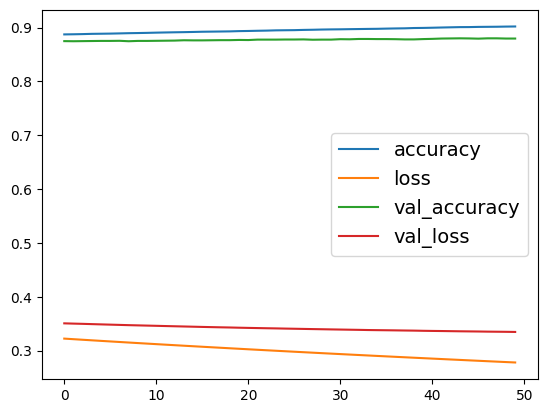

In [158]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.show()

In [159]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8732 - loss: 0.3548


[0.3563472330570221, 0.8737000226974487]

In [161]:
y_prob = model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [162]:
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.06, 0.  , 0.85]],
      dtype=float32)

# Building Regression MLP With Sequential API

In [17]:
tf.random.set_seed(42)

# Need to get the california data set
from tensorflow.keras.datasets import california_housing

In [21]:
(cal_x_train, cal_y_train), (cal_x_test, cal_y_test) = california_housing.load_data()

In [22]:
cal_x_train.shape

(16512, 8)

In [23]:
cal_x_test.shape

(4128, 8)

In [24]:
# Pull 4128 out of the housing set for validation
cal_x_val, cal_y_val = cal_x_train[-4128:], cal_y_train[-4128:]
cal_x_train, cal_y_train = cal_x_train[:-4128], cal_y_train[:-4128]

In [25]:
cal_x_val.shape

(4128, 8)

In [26]:
cal_x_train.shape

(12384, 8)

In [35]:
# Using previous housing to be consistent with thje book
housing = fetch_california_housing()
cal_x_train_full, cal_x_test, cal_y_train_full, cal_y_test = train_test_split(
    housing.data, housing.target, random_state=42)
cal_x_train, cal_x_val, cal_y_train, cal_y_val = train_test_split(
    cal_x_train_full, cal_y_train_full, random_state=42)

In [36]:
# Normalize layer, Similar to StandardScalar() in SKlearn
norm_layer = tf.keras.layers.Normalization()
cal_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(cal_x_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])
cal_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,618 (21.95 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

In [37]:
# Need loss and optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
cal_model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

# Need to call adapt before model to normalize properly
norm_layer.adapt(cal_x_train)
history = cal_model.fit(cal_x_train, cal_y_train, epochs=20, validation_data=(cal_x_val, cal_y_val))

mse_test, rmse_test = cal_model.evaluate(cal_x_test, cal_y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - RootMeanSquaredError: 1.2809 - loss: 1.7586 - val_RootMeanSquaredError: 0.8070 - val_loss: 0.6512
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - RootMeanSquaredError: 0.6422 - loss: 0.4129 - val_RootMeanSquaredError: 0.9277 - val_loss: 0.8606
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - RootMeanSquaredError: 0.6099 - loss: 0.3724 - val_RootMeanSquaredError: 0.7212 - val_loss: 0.5201
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - RootMeanSquaredError: 0.5951 - loss: 0.3544 - val_RootMeanSquaredError: 1.4234 - val_loss: 2.0260
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - RootMeanSquaredError: 0.5876 - loss: 0.3456 - val_RootMeanSquaredError: 1.2641 - val_loss: 1.5979
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - RootMeanSquaredError: 0.5743 - loss: 0.3300 - val_RootMeanSquaredError: 0.9105 - val_loss: 0.8289
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - RootMeanSquaredError

In [38]:
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')

MSE: 0.28415679931640625
RMSE: 0.5330635905265808
